In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [4]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93
999,male,group E,bachelor's degree,standard,completed,100,100,100


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
import warnings
warnings.filterwarnings('ignore')

### 1. Find out how many males and females participated in the test.


In [7]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

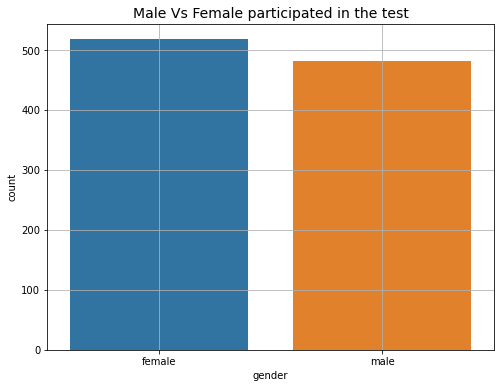

In [17]:
plt.figure(figsize=(8,6))
sns.countplot(df['gender'])
plt.title('Male Vs Female participated in the test',fontsize=14)
plt.grid()
plt.show()

### 2. What do you think about the students' parental level of education?

In [27]:
df['parental level of education'].unique()

array(['some high school', 'high school', 'some college',
       "associate's degree", "bachelor's degree", "master's degree"],
      dtype=object)

In [23]:
pa=pd.DataFrame(df['parental level of education'].value_counts())

In [55]:
pa

,parental level of education
some college,226
associate's degree,222
high school,196
some high school,179
bachelor's degree,118
master's degree,59


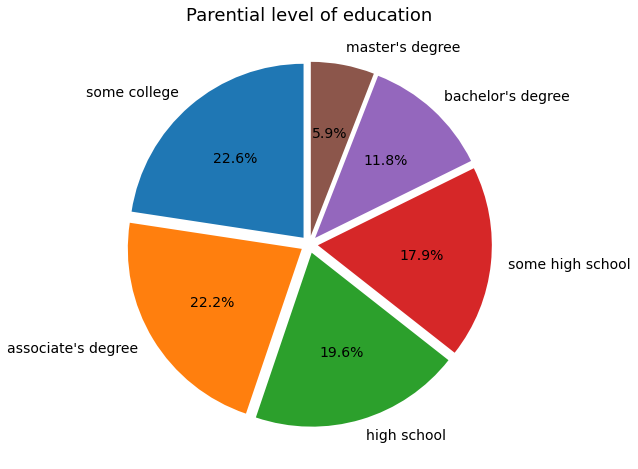

In [59]:
plt.figure(figsize=(10,8))
plt.pie(x='parental level of education',data=pa,labels=pa.index,startangle=90,autopct='%1.1f%%',
        explode=(0.05,0.05,0.05,0.05,0.05,0.05),textprops={'fontsize': 14})
plt.title('Parential level of education',fontsize=18)
plt.show()

### 3. Who scores the most on average for math, reading and writing based on
    ● gender
    

In [61]:
df.groupby('gender')['math score','reading score','writing score'].mean()

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


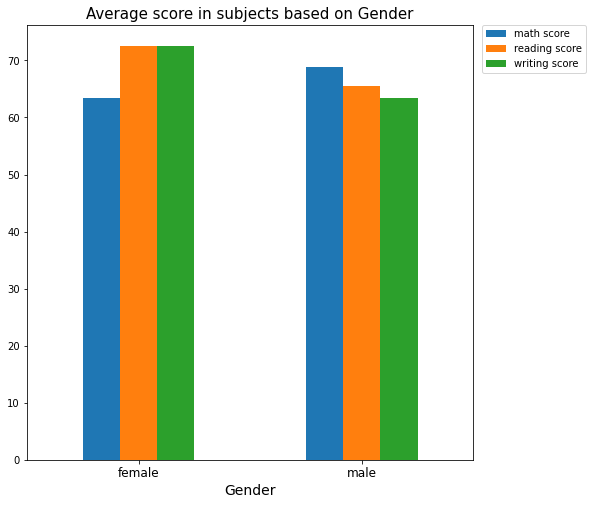

In [99]:
df.groupby('gender')['math score','reading score','writing score'].mean().plot.bar(figsize=(8,8))
plt.title('Average score in subjects based on Gender',fontsize=15)
plt.legend(loc=(1.02,.89))
plt.xticks(rotation=0,fontsize=12)
plt.xlabel('Gender',fontsize=14)
plt.show()

### Based on
    ● Test preparation course

In [83]:
df.groupby('test preparation course')['math score','reading score','writing score'].mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


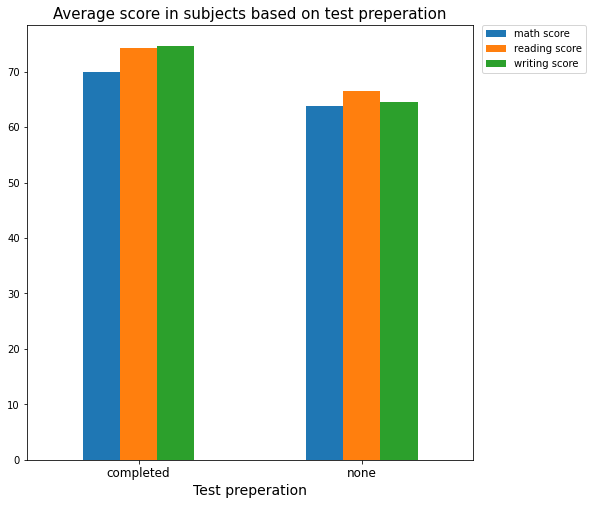

In [98]:
df.groupby('test preparation course')['math score','reading score','writing score'].mean().plot.bar(figsize=(8,8))
plt.title('Average score in subjects based on test preperation',fontsize=15)
plt.legend(loc=(1.02,.89))
plt.xticks(rotation=0,fontsize=12)
plt.xlabel('Test preperation',fontsize=14)
plt.show()

### 4. What do you think about the scoring variation for math, reading and writing 
    based on
    ● Gender

In [109]:
df.groupby('gender')[ 'math score','reading score','writing score'].var()

,math score,reading score,writing score
gender,,,
female,256.958593,207.677438,220.369327
male,211.889097,200.211010,202.413924


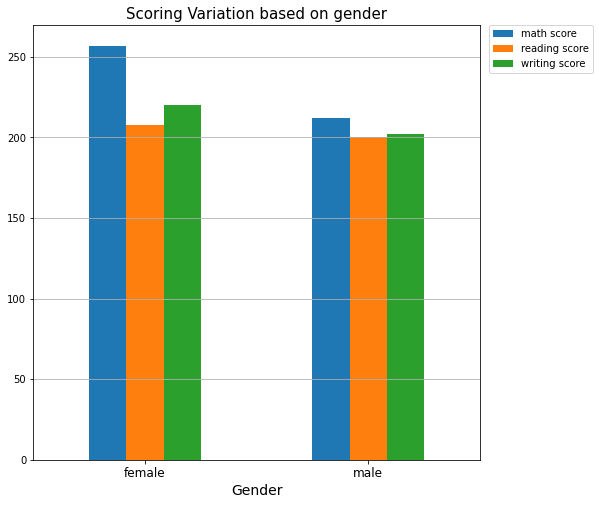

In [113]:
df.groupby('gender')[ 'math score','reading score','writing score'].var().plot.bar(figsize=(8,8))
plt.title('Scoring Variation based on gender',fontsize=15)
plt.legend(loc=(1.02,.89))
plt.xticks(rotation=0,fontsize=12)
plt.xlabel('Gender',fontsize=14)
plt.grid(axis='y')
plt.show()

### based on
    ● Test preparation course

In [115]:
df.groupby('test preparation course')[ 'math score','reading score','writing score'].var()

,math score,reading score,writing score
test preparation course,,,
completed,210.884027,183.265864,175.202612
none,246.668662,213.419851,226.251739


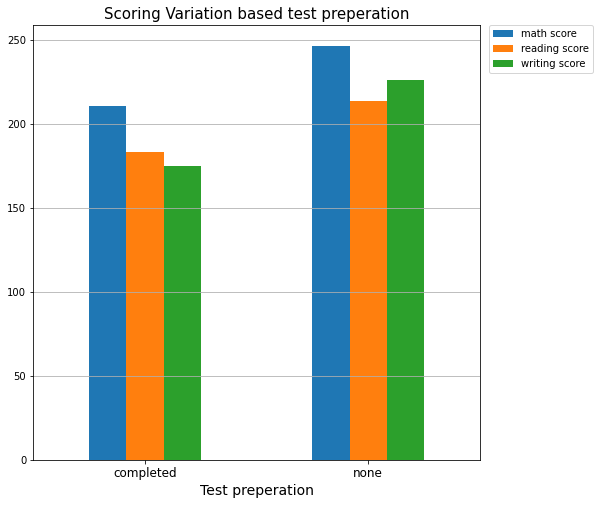

In [119]:
df.groupby('test preparation course')['math score','reading score','writing score'].var().plot.bar(figsize=(8,8))
plt.title('Scoring Variation based test preperation',fontsize=15)
plt.legend(loc=(1.02,.89))
plt.xticks(rotation=0,fontsize=12)
plt.xlabel('Test preperation',fontsize=14)
plt.grid(axis='y')
plt.show()

### 5. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this.


In [126]:
df.sort_values(by='math score',ascending=False).head(25)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
999,male,group E,bachelor's degree,standard,completed,100,100,100,100.000000
996,male,group A,some college,standard,completed,100,96,86,94.000000
515,female,group E,some college,standard,none,100,92,97,96.333333
517,female,group E,associate's degree,standard,none,100,100,100,100.000000
516,female,group E,bachelor's degree,standard,none,100,100,100,100.000000
997,male,group D,some college,standard,completed,100,97,99,98.666667
998,male,group E,associate's degree,free/reduced,completed,100,100,93,97.666667
995,male,group E,some college,standard,completed,99,87,81,89.000000
513,female,group E,bachelor's degree,standard,completed,99,100,100,99.666667
514,female,group E,high school,standard,none,99,93,90,94.000000


In [127]:
# top 25 students based on average score

In [118]:
df.groupby('gender').describe()

math score                                                       \
            count       mean        std   min   25%   50%   75%    max   
gender                                                                   
female      518.0  63.376448  16.029928   0.0  54.0  65.0  74.0  100.0   
male        482.0  68.821577  14.556411  27.0  59.0  69.0  79.0  100.0   

       reading score             ...              writing score             \
               count       mean  ...   75%    max         count       mean   
gender                           ...                                         
female         518.0  72.590734  ...  83.0  100.0         518.0  72.467181   
male           482.0  65.545643  ...  76.0  100.0         482.0  63.446058   

                                                  
              std   min   25%   50%   75%    max  
gender                                            
female  14.844842  10.0  64.0  74.0  82.0  100.0  
male    14.227225  15.0  53.0  64.0  74.0  100.0  

[2 rows x 24 columns]

In [123]:
df['average']=df[['math score','reading score','writing score']].mean(numeric_only=True, axis=1)

In [128]:
df.sort_values(by='average',ascending=False).head(25)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
999,male,group E,bachelor's degree,standard,completed,100,100,100,100.000000
517,female,group E,associate's degree,standard,none,100,100,100,100.000000
516,female,group E,bachelor's degree,standard,none,100,100,100,100.000000
513,female,group E,bachelor's degree,standard,completed,99,100,100,99.666667
512,female,group D,some college,standard,none,98,100,99,99.000000
511,female,group D,some high school,standard,completed,97,100,100,99.000000
997,male,group D,some college,standard,completed,100,97,99,98.666667
508,female,group C,bachelor's degree,standard,completed,96,100,100,98.666667
998,male,group E,associate's degree,free/reduced,completed,100,100,93,97.666667
506,female,group E,master's degree,standard,completed,94,99,100,97.666667
